In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from graph_prep import GraphBuilder
from river_graph import RiverGraph

All of Alaska:

In [3]:
%%time
gb = GraphBuilder('data/usgs_national_map/NatMapStreams3338.shp')

CPU times: user 41.9 s, sys: 835 ms, total: 42.7 s
Wall time: 42.3 s


In [4]:
rg = gb.graph

In [3]:
pos0 = (-320315, 1284942)
pos1 = (-463112, 1167822)

In [6]:
rg.closest_node(pos0)

ValueError: operands could not be broadcast together with shapes (0,) (2,) 

In [7]:
narr = np.array(rg.nodes())

In [8]:
narr

array([], dtype=float64)

In [5]:
import networkx as nx

In [10]:
nrg = nx.read_shp('data/usgs_national_map/NatMapStreams3338.shp')

In [15]:
len(nrg.edges())

0

In [6]:
import geopandas as gpd

## Weird

Initially, this shapefile which was exported from a gdb in QGIS, showed no features when loaded into networkx. Then after opening and saving with geopandas, it works. Very odd.

In [13]:
nms = gpd.read_file('data/usgs_national_map/NatMapStreams3338.shp')

In [14]:
len(nms)

415940

In [16]:
nms.to_file('data/NatMapTest.shp')

In [17]:
nms.crs

{u'datum': u'NAD83',
 u'lat_0': 50,
 u'lat_1': 55,
 u'lat_2': 65,
 u'lon_0': -154,
 u'no_defs': True,
 u'proj': u'aea',
 u'units': u'm',
 'wktext': True,
 u'x_0': 0,
 u'y_0': 0}

In [7]:
gb = GraphBuilder('data/NatMapTest.shp')

In [8]:
isls = nx.isolates(gb.graph)

In [9]:
len(isls)

0

In [10]:
trg = gb.graph

In [11]:
len(trg.nodes())

418120

In [12]:
n0 = trg.closest_node(pos0)

In [13]:
sg = trg.reachable_subgraph(n0)

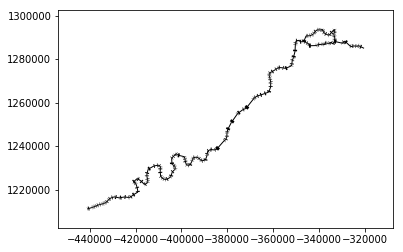

In [14]:
sg.plot()

In [15]:
sg.deadend_nodes()

[[-441059.8436721521, 1211067.9774030154]]

In [16]:
narr = np.array(sg.nodes())

In [17]:
narr[np.apply_along_axis(sg.is_deadend, 1, narr)].tolist()

[[-441059.8436721521, 1211067.9774030154]]

In [45]:
is_deadend(trg, n0)

False

In [46]:
np.array(trg.nodes())

array([[  234865.80808219,  1490875.14747068],
       [ -149245.16799717,  1144426.62028447],
       [ -481294.85757779,  1299120.05473033],
       ..., 
       [  -76120.80895121,  1323135.79352673],
       [  -77592.33646043,   918406.41179928],
       [   87513.45508932,  2015632.77933078]])